In [2]:
import numpy as np
from DG_classes import *
from DiffusionGeometry import *
import matplotlib.pyplot as plt
from DG_ml_stats import *
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from visualisation import *

In [3]:
parameters = {}
parameters['n0'] = 50
parameters['n1'] = 50
parameters['n2'] = 4
parameters['ep'] = 0.2
parameters['alpha'] = 1
parameters['projection_tol'] = 1e-2
n0,n1,n2 = parameters['n0'],parameters['n1'],parameters['n2']
parameters

{'n0': 50, 'n1': 50, 'n2': 4, 'ep': 0.2, 'alpha': 1, 'projection_tol': 0.01}

array([ -0.   ,   1.161,   6.441,   9.268,  15.973,  21.314,  23.221,
        26.565,  38.569,  41.554,  43.677,  45.362,  55.789,  65.3  ,
        68.093,  69.319,  77.21 ,  80.907,  81.754,  90.848,  96.85 ,
       102.791, 106.406, 109.887, 112.878, 122.529, 125.625, 128.042,
       130.63 , 137.826, 144.914, 147.516, 155.084, 157.795, 161.339,
       164.838, 166.547, 175.659, 181.478, 185.368, 190.611, 195.796,
       201.125, 203.896, 207.89 , 213.483, 216.526, 220.739, 231.132,
       235.091])

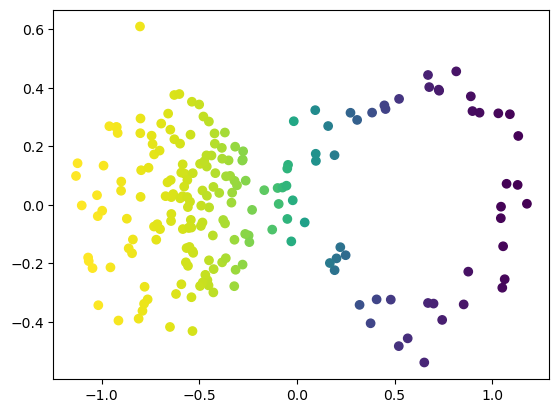

In [4]:
n = 100
xx = np.linspace(0, 2*np.pi, n)
data = np.array([[np.cos(x), np.sin(x)] for x in xx]) + 0.2*np.random.randn(xx.shape[0], 2)
data = 1*np.array([[np.cos(x)/(1 + np.sin(x)**2), np.sin(x)*np.cos(x)/(1 + np.sin(x)**2)] for x in xx]) + 0.06*np.random.randn(xx.shape[0], 2) + 0.1*data

data = np.concatenate((data, 0.2*np.random.randn(100,2) - [0.6,0]))

test = DG(data, parameters)

plt.scatter(test.data[:,0], test.data[:,1], c = test.u()[1])
# test.weak_eigenproblem_1(test.D1())

test.lam().round(3)



array([-0.   ,  0.573,  1.594,  1.688,  3.217,  3.706,  4.848,  5.916,
        7.   ,  7.393, 10.052, 10.372, 11.219, 13.994, 15.864, 19.316,
       20.84 , 21.797, 22.46 , 24.406, 26.101, 28.66 , 29.123, 29.87 ,
       32.828, 33.121, 37.107, 39.926, 40.572, 41.755, 41.808, 47.615,
       49.483, 51.491, 52.682, 53.276, 55.303, 61.496, 63.708, 64.189,
       65.576, 66.115, 68.464, 75.969, 77.825, 78.829, 80.117, 80.719,
       82.924, 88.295])

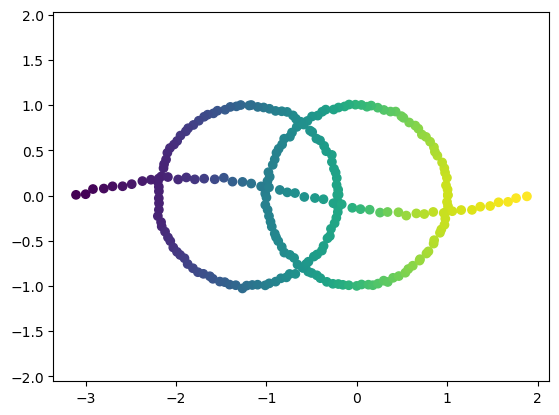

In [5]:
parameters = {}
parameters['n0'] = 50
parameters['n1'] = 10
parameters['n2'] = 4
parameters['ep'] = 0.3
parameters['alpha'] = 1
parameters['projection_tol'] = 1e-2

n = 100
xx = np.linspace(0, 2*np.pi, n)
data = np.array([[np.cos(x) + 0.1*np.cos(5*x), 0.2*x*np.sin(x) + 0.3*np.sin(x)] for x in xx]) + 0.*np.random.randn(xx.shape[0], 2)
# data = 1*np.array([[np.cos(x)/(1 + np.sin(x)**2), np.sin(x)*np.cos(x)/(1 + np.sin(x)**2)] for x in xx]) + 0.01*np.random.randn(xx.shape[0], 2) + 0.1*data
data = np.array([[np.cos(x), np.sin(x)] for x in xx])

# data = np.concatenate((data, 0.2*np.random.randn(100,2) - [0.6,0]))
curve = np.array([[x*0.8 - 3.1, 0.2*np.sin(x)] for x in xx[::2]]) 

# data = np.concatenate((data, -curve))
data = np.concatenate((data, data - [1.2,0], curve ))
data += 0.01*np.random.randn(data.shape[0],data.shape[1])
# data += 0.1*np.random.randn(data.shape[0],data.shape[1])
# data = np.concatenate((data, 0.5*np.random.randn(10,data.shape[1])))
test = DG(data, parameters)

data = np.array([[np.cos(x), np.sin(x)] for x in xx])

# fig, ax = plt.subplots(figsize = (8,6))
# ax.plot(data[:,0], data[:,1], c = 'k')
# ax.plot(data[:,0] - 1.2, data[:,1], c = 'k')
# ax.plot(curve[:,0], curve[:,1], c = 'k')
# ax.axis('off')

plt.scatter(test.data[:,0], test.data[:,1], c = test.u()[1])
plt.axis('equal')
# test.weak_eigenproblem_1(test.D1())

test.lam().round(3)


In [246]:
ball = np.random.randn(800,3)
ball /= np.linalg.norm(ball, axis = 1).reshape(-1,1)

x = np.linspace(0,2*np.pi,60)
circle = np.stack([np.cos(x),np.zeros(x.shape[0]),np.sin(x)],axis=1) + [-1.75,0,1]

data = np.concatenate([ball,circle,ball + [1.5,0,0]], axis=0)
data += 0.1*np.random.randn(data.shape[0],3)
parameters['ep'] = 0.22
test = DG(data, parameters)
plot_3d(data)


test = DG(data, parameters)

# plt.scatter(test.data[:,0], test.data[:,2], c = test.u()[3])
# test.weak_eigenproblem_1(test.D1())

# test.lam().round(3)


# vmin = 0.004
# vmax = 0.007

# fig = go.Figure(data=[go.Scatter3d(x = data[:,0],
#                                     y = data[:,1],
#                                     z = data[:,2],
#                                     mode='markers',
#                                     marker=dict(
#                                             size=10,
#                                             color=test.u()[6],                # set color to an array/list of desired values
#                                             # colorscale='PRGn',   # choose a colorscale
#                                             opacity=1
#                                         ))])
# fig.update_traces(marker_size = 3)
# fig.update_layout(scene_aspectmode='data')
# fig.show()

In [247]:
def pointwise_CdC(lam, u, C3_000):
    cdc = (1/2)*(lam.reshape(-1,1,1)
                 +lam.reshape(1,-1,1)
                 -lam.reshape(1,1,-1))*C3_000
    return contract('ijk,ks->sij', cdc, u)

def pointwise_metric_eigenvalues(pointwise_cdc, max_val = 5):
    n0 = pointwise_cdc.shape[-1]
    return np.array([eigh(m, eigvals_only=True, subset_by_index=[n0-max_val,n0-1])[::-1] for m in pointwise_cdc])

pointwise_cdc = pointwise_CdC(test.lam(), test.u(), test.C3_000())
pointwise_eigenvalues = pointwise_metric_eigenvalues(pointwise_cdc)


val1 = pointwise_eigenvalues[:,0]
val2 = pointwise_eigenvalues[:,2]

vmin = 8
vmax = 9

# fig, ax = plt.subplots(2,2,figsize = (15,10))
# ax[0,0].scatter(test.data[:,0], test.data[:,2], c = pointwise_eigenvalues[:,0], vmin = vmin, vmax = vmax)
# ax[0,1].scatter(test.data[:,0], test.data[:,2], c = pointwise_eigenvalues[:,1], vmin = vmin, vmax = vmax)
# ax[1,0].scatter(test.data[:,0], test.data[:,2], c = pointwise_eigenvalues[:,2], vmin = vmin, vmax = vmax)
# ax[1,1].scatter(test.data[:,0], test.data[:,2], c = pointwise_eigenvalues[:,3], vmin = vmin, vmax = vmax)

# plt.scatter(test.data[:,0], test.data[:,1], c = pointwise_eigenvalues.sum(axis=1), vmin = 0, vmax = 10)

In [248]:
val1

array([4.76526337, 4.721193  , 6.08580965, ..., 4.2153034 , 3.48216467,
       6.09208265])

In [255]:
def plot_scatter_limits(data, c, lower_col_min, lower_col_max, upper_col_min, upper_col_max):

    fig = go.Figure()

    fig.add_trace(go.Scatter(x = data[:,0], 
                             y = data[:,1], 
                             mode= 'markers',
                             marker=dict(size = 9,
                                         cmid = 0,
                                         cmin = lower_col_min,
                                         cmax = lower_col_max,
                                         color="lightgray")))
    
    opacity_upper = np.clip(c, upper_col_min, upper_col_max)
    opacity_upper -= upper_col_min
    opacity_upper /= upper_col_max - upper_col_min

    fig.add_trace(go.Scatter(x = data[:,0], 
                             y = data[:,1], 
                             mode= 'markers',
                             marker=dict(size = 9,
                                         cmid = 0,
                                         color = "#166dde",
                                         opacity=opacity_upper)))
    
    opacity_lower = np.clip(c, lower_col_min, lower_col_max)
    opacity_lower -= lower_col_min
    opacity_lower /= lower_col_max - lower_col_min
    opacity_lower = 1 - opacity_lower
    
    fig.add_trace(go.Scatter(x = data[:,0], 
                             y = data[:,1], 
                             mode= 'markers',
                             marker=dict(size = 9,
                                         cmid = 0,
                                         color = "#e32636",
                                         opacity=opacity_lower)))
    fig.update_layout(width=800, 
                    height=500, 
                    showlegend=False, 
                    paper_bgcolor='rgba(0,0,0,0)', 
                    plot_bgcolor='rgba(0,0,0,0)', 
                    xaxis_visible=False, 
                    yaxis_visible=False,
                    xaxis_range = [-1.3,1.3],
                    yaxis_range = [-0.1,0.1])
    fig.update_yaxes(
        scaleanchor="x",
        scaleratio=1,
    )
    return fig

def plot_scatter_limits_3d(data, c, lower_col_min, lower_col_max, upper_col_min, upper_col_max, theta_x, theta_z):

    fig = go.Figure()
    Rz = np.array([[np.cos(theta_z),np.sin(theta_z),0],[-np.sin(theta_z),np.cos(theta_z),0],[0,0,1]])
    Rx = np.array([[1,0,0],[0,np.cos(theta_x),np.sin(theta_x)]])
    rotated_data = data @ Rz.T @ Rx.T

    fig.add_trace(go.Scatter(x = rotated_data[:,0], 
                             y = rotated_data[:,1], 
                             mode= 'markers',
                             marker=dict(size = 9,
                                         cmid = 0,
                                         cmin = lower_col_min,
                                         cmax = lower_col_max,
                                         color="lightgray")))
    
    opacity_upper = np.clip(c, upper_col_min, upper_col_max)
    opacity_upper -= upper_col_min
    opacity_upper /= upper_col_max - upper_col_min

    fig.add_trace(go.Scatter(x = rotated_data[:,0], 
                             y = rotated_data[:,1], 
                             mode= 'markers',
                             marker=dict(size = 9,
                                         cmid = 0,
                                         color = "#166dde",
                                         opacity=opacity_upper)))
    
    opacity_lower = np.clip(c, lower_col_min, lower_col_max)
    opacity_lower -= lower_col_min
    opacity_lower /= lower_col_max - lower_col_min
    opacity_lower = 1 - opacity_lower
    
    fig.add_trace(go.Scatter(x = rotated_data[:,0], 
                             y = rotated_data[:,1], 
                             mode= 'markers',
                             marker=dict(size = 9,
                                         cmid = 0,
                                         color = "#e32636",
                                         opacity=opacity_lower)))
    fig.update_layout(width=800, 
                    height=500, 
                    showlegend=False, 
                    paper_bgcolor='rgba(0,0,0,0)', 
                    plot_bgcolor='rgba(0,0,0,0)', 
                    xaxis_visible=False, 
                    yaxis_visible=False,
                    xaxis_range = [rotated_data[:,0].min() - 0.05, rotated_data[:,0].max() + 0.05],
                    yaxis_range = [rotated_data[:,1].min() - 0.05, rotated_data[:,1].max() + 0.05])
    fig.update_yaxes(
        scaleanchor="x",
        scaleratio=1,
    )
    return fig

fig1 = plot_scatter_limits_3d(test.data, val1, 3.4, 3.6, 99, 100, 1, np.pi + 0.3)
# plot_scatter_limits(test.data, val1, 0, 1, 18, 20)
fig1.show()
fig1.write_image("images/fig.png", scale = 1) 

In [49]:

vmin = 5
vmax = 7.7

fig = go.Figure(data=[go.Scatter3d(x = data[:,0],
                                    y = data[:,1],
                                    z = data[:,2],
                                    mode='markers',
                                    marker=dict(
                                            size=10,
                                            color=pointwise_eigenvalues[:,0],                # set color to an array/list of desired values
                                            # colorscale='PRGn',   # choose a colorscale
                                            opacity=1,
                                            cmax = vmax,
                                            cmin = vmin
                                        ))])
fig.update_traces(marker_size = 3)
fig.update_layout(scene_aspectmode='data')
fig.show()

In [336]:


vmin = 0.002
vmax = 0.007

fig = go.Figure(data=[go.Scatter3d(x = data[:,0],
                                    y = data[:,1],
                                    z = data[:,2],
                                    mode='markers',
                                    marker=dict(
                                            size=10,
                                            color=pointwise_eigenvalues[:,1],                # set color to an array/list of desired values
                                            # colorscale='PRGn',   # choose a colorscale
                                            opacity=1,
                                            cmax = vmax,
                                            cmin = vmin
                                        ))])
fig.update_traces(marker_size = 3)
fig.update_layout(scene_aspectmode='data')
fig.show()

In [337]:
n0,n1,n2 = parameters['n0'], parameters['n1'], parameters['n2']
cdc_110 = pointwise_cdc[:n0,:n1,:n1].T
Gamma2 = cdc_110.reshape(n1,1,n1,1,n0,1)*cdc_110.reshape(1,n1,1,n1,1,n0) - cdc_110.reshape(1,n1,n1,1,n0,1)*cdc_110.reshape(n1,1,1,n1,1,n0)
tensorg2 = contract('stu,ijIJst->ijIJu', test.C3_000(), Gamma2)
pointwise_g2 = (tensorg2.reshape(n1**2,n1**2,n0) @ test.u()).T
pointwise_g2.shape

: 

In [ ]:
def pointwise_metric_eigenvalues(pointwise_cdc, max_val = 5):
    n0 = pointwise_cdc.shape[-1]
    return np.array([eigh(m, eigvals_only=True, subset_by_index=[n0-max_val,n0-1])[::-1] for m in pointwise_cdc])

pointwise_eigenvalues = pointwise_metric_eigenvalues(pointwise_g2)
pointwise_eigenvalues.min()

9.016912109718026e-10

In [ ]:


val1 = pointwise_eigenvalues[:,0]
val2 = pointwise_eigenvalues[:,2]


vmin = 0.00
vmax = 5e-9

fig = go.Figure(data=[go.Scatter3d(x = data[:,0],
                                    y = data[:,1],
                                    z = data[:,2],
                                    mode='markers',
                                    marker=dict(
                                            size=10,
                                            color=val1,                # set color to an array/list of desired values
                                            # colorscale='PRGn',   # choose a colorscale
                                            opacity=1,
                                            cmax = vmax,
                                            cmin = vmin
                                        ))])
fig.update_traces(marker_size = 3)
fig.update_layout(scene_aspectmode='data')
fig.show()

# vmin = 0.0000
# vmax = 0.00015

# fig, ax = plt.subplots(2,2,figsize = (15,10))
# ax[0,0].scatter(test.data[:,0], test.data[:,1], c = pointwise_eigenvalues[:,0], vmin = vmin, vmax = vmax)
# ax[0,1].scatter(test.data[:,0], test.data[:,1], c = pointwise_eigenvalues[:,1], vmin = vmin, vmax = vmax)
# ax[1,0].scatter(test.data[:,0], test.data[:,1], c = pointwise_eigenvalues[:,2], vmin = vmin, vmax = vmax)
# ax[1,1].scatter(test.data[:,0], test.data[:,1], c = pointwise_eigenvalues[:,3], vmin = vmin, vmax = vmax)

In [201]:
val1

array([2.37174540e-10, 1.45192724e-10, 2.73206058e-10, 3.23143283e-10,
       1.07320513e-10, 7.13584598e-11, 1.32726425e-10, 1.55469315e-10,
       1.03592185e-10, 1.95860311e-10, 1.56988099e-10, 1.54576456e-10,
       1.92462118e-10, 4.53308445e-10, 2.08574922e-10, 9.42520435e-11,
       1.72265725e-10, 1.06185955e-10, 1.63043751e-10, 1.33686137e-10,
       4.63663165e-10, 1.02364477e-10, 2.19804356e-10, 2.10919868e-10,
       4.75086627e-10, 9.40825605e-11, 1.20354427e-10, 1.98997008e-10,
       2.38209860e-10, 2.19277837e-10, 9.11134659e-11, 9.98668833e-11,
       2.09465909e-10, 1.05615401e-10, 1.25910078e-10, 5.54508115e-11,
       2.96434051e-10, 2.25118244e-10, 2.52409718e-10, 2.11592688e-10,
       1.53851798e-10, 3.38349526e-10, 2.27169844e-10, 6.06129886e-11,
       8.11892843e-11, 1.13776660e-10, 1.65818976e-10, 1.30577169e-10,
       9.75290979e-11, 8.96842294e-11, 1.43814558e-10, 1.15275427e-10,
       2.79063221e-10, 2.05185870e-10, 1.53639134e-10, 2.10718888e-10,
      